# Student Dataset Cleaning, EDA, and Outliers Handling
This notebook solves the assignment on data cleaning, missing values, and outliers handling for the provided **Student Dataset**.

In [35]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("bi.csv", encoding="latin1")
df.head()


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


## Part 1 – Data Cleaning
### Dataset Structure

In [52]:

# Shape, info, head
print("\nShape:", df.shape)
print("\n\nInfo:")
print(df.info())
print("\n\nHead:\n",df.head())



Shape: (77, 11)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None


Head:
        fNAME      lNAME  Age  gender       country  residence  entryEXAM  \
0  Christina     Binger   44  Female        Norway    Private         72   
1       Alex   Walekhwa   60       M         Kenya    Private         79

**Question:** Which columns should be categorical and which should be numerical?

- Categorical: `fNAME`, `lNAME`, `gender`, `country`, `residence`, `prevEducation`
- Numerical: `Age`, `entryEXAM`, `studyHOURS`, `Python`, `DB`

### Detect Inconsistent Categories

In [53]:

print("Unique values in gender:", df['gender'].unique())
print("Unique values in country:", df['country'].unique())
print("Unique values in prevEducation:", df['prevEducation'].unique())


Unique values in gender: ['Female' 'M' 'Male' 'F' 'female' 'male']
Unique values in country: ['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
Unique values in prevEducation: ['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


In [54]:

# Fix gender inconsistencies
df['gender'] = df['gender'].replace({'M':'Male', 'F':'Female'})
df['gender'] = df['gender'].str.strip().str.title()

# Fix country inconsistencies (example: RSA vs Rsa vs South Africa)
df['country'] = df['country'].str.strip().str.upper()
df['country'] = df['country'].replace({'RSA':'SOUTH AFRICA'})

# Fix prevEducation inconsistencies
df['prevEducation'] = df['prevEducation'].str.strip().str.title()
df['prevEducation'] = df['prevEducation'].replace({
    'Highschool':'High School', 'Highschool ':'High School', 'Barrrchelors':'Bachelor', 'Diplomaaa':'Diploma'
})

df[['gender','country','prevEducation']].head()


,gender,country,prevEducation
0,Female,NORWAY,Masters
1,Male,KENYA,Diploma
2,Male,UGANDA,High School
3,Female,SOUTH AFRICA,High School
4,Female,SOUTH AFRICA,High School


### Handle Duplicates

In [57]:

print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate rows: 0


## Part 2 – Missing Data

In [59]:

# Missing values check
df.isnull().sum()


fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

**Question:** Which columns are most affected by missing values?

- Python scores have missing values.
- Possibly other categorical fields may have small missing entries.

In [61]:

# Option 1: Numerical imputation (Python, DB) with mean
df['Python_mean_imputed'] = df['Python'].fillna(df['Python'].mean())

# Option 2: Numerical imputation with median
df['Python_median_imputed'] = df['Python'].fillna(df['Python'].median())

# Option 3: For categorical, fill with mode
for col in ['gender','country','prevEducation']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.head()


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Python_mean_imputed,Python_median_imputed
0,Christina,Binger,44,Female,NORWAY,Private,72,Masters,158,59.0,55,59.000000,59.0
1,Alex,Walekhwa,60,Male,KENYA,Private,79,Diploma,150,60.0,75,60.000000,60.0
2,Philip,Leo,25,Male,UGANDA,Sognsvann,55,High School,130,74.0,50,74.000000,74.0
3,Shoni,Hlongwane,22,Female,SOUTH AFRICA,Sognsvann,40,High School,120,NaN,44,75.853333,81.0
4,Maria,Kedibone,23,Female,SOUTH AFRICA,Sognsvann,65,High School,122,91.0,80,91.000000,91.0


## Part 3 – Outliers

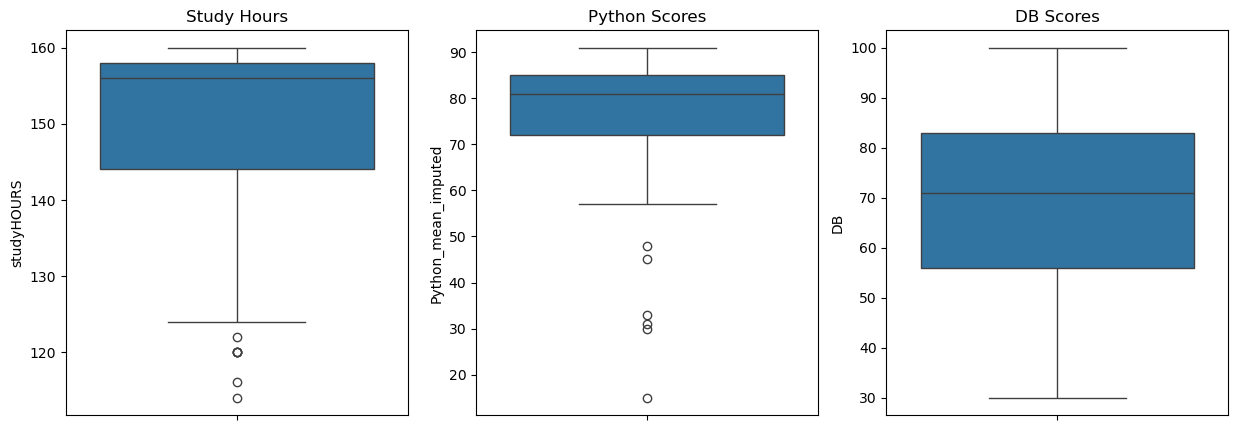

In [63]:

# Boxplots for numerical columns
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(y=df['studyHOURS'], ax=axes[0])
axes[0].set_title("Study Hours")
sns.boxplot(y=df['Python_mean_imputed'], ax=axes[1])
axes[1].set_title("Python Scores")
sns.boxplot(y=df['DB'], ax=axes[2])
axes[2].set_title("DB Scores")
plt.show()


In [69]:

# IQR method for outlier handling
def handle_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

df['studyHOURS_cleaned'] = handle_outliers(df['studyHOURS'])
df['Python_cleaned'] = handle_outliers(df['Python_mean_imputed'])
df['DB_cleaned'] = handle_outliers(df['DB'])


## Final Deliverable

In [70]:

# Export cleaned dataset
df.to_csv("cleaned_students.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_students.csv")


✅ Cleaned dataset saved as cleaned_students.csv
